In [ ]:
# Project: Predicting Apple Stock Price by using Recurrent Neural Network
# Author: Duc Tran
# Description: This model predicted stocked price of Apple in 3 months using Yahoo API (yfinance)
# Method: Using Recurrent Neural Network to train and improve the data
# This project is an upgrade version of older RNN network that use the "old" method of gathering data (download with csv)

In [46]:
# Pulling data from Yahoo Finance using yfinance API
import yfinance as yf
stock = yf.Ticker("AAPL")
stock_data = stock.history(period="5y")["Close"]
print(stock_data)

Date
2019-09-11 00:00:00-04:00     54.088882
2019-09-12 00:00:00-04:00     53.967930
2019-09-13 00:00:00-04:00     52.918037
2019-09-16 00:00:00-04:00     53.196232
2019-09-17 00:00:00-04:00     53.389759
                                ...    
2024-09-04 00:00:00-04:00    220.850006
2024-09-05 00:00:00-04:00    222.380005
2024-09-06 00:00:00-04:00    220.820007
2024-09-09 00:00:00-04:00    220.910004
2024-09-10 00:00:00-04:00    220.110001
Name: Close, Length: 1258, dtype: float64


In [47]:
# Normalize the data using MinMaxScaler
# The maximum stocks of 90 days is set into 1, the minimum stock of 90 days is set to 0
# Other days, the stock normalized value is calculated by the formula: (Stock_Price_Current - Stock_Price_Min)/(Stock_Price_Max - Stock_Price_Min)
# And transform stock data into a readable dataframe
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data_scaled = scaler.fit_transform(stock_data.values.reshape(-1, 1))
print(stock_data_scaled)

[[0.00786031]
 [0.00719533]
 [0.00142318]
 ...
 [0.92452271]
 [0.92501749]
 [0.9206192 ]]


In [52]:
import numpy as np
import pandas as pd

# This function create the sequences to predict the data
# The X dataframe will consists of data in continuous days, with length = time_steps
# The y data will consists the data of next days that is corresponding to the X dataframe
# Example: First element of X: stock normalized data from day 1 to day 10
#          First element of Y: stock normalized data of day 11
#          Second element of X: stock normalized data from day 2 to day 11
#          Second element of Y: stock normalized data of day 12...
# We are using 10 days as a time_steps
def create_sequences(data, time_steps):
    sequences = []
    labels = []
    for i in range(0, len(data) - time_steps):
        sequences.append(data[i:i+time_steps])
        labels.append(data[i+time_steps])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(stock_data_scaled, 10)

# Split into training and testing sets (80% train, 20% test)
train_size = int(X.shape[0] * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [54]:
# Set up the Recurrent Neural Network with Keras library
# Set up to train with 100 epochs, batch size of 32
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


model = Sequential()

model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(time_steps, 1)))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

# Train the RNN model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1674 - val_loss: 0.0329
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0246
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0211
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0165
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0097
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0082
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 0.0062
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9489e-04 - val_loss: 0.0041
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8041e-04 - val_loss: 0.0030
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2904e-04 - val_loss: 0.0024
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4286e-04 - val_loss: 0.0028
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R² Score: 0.9755305093396106


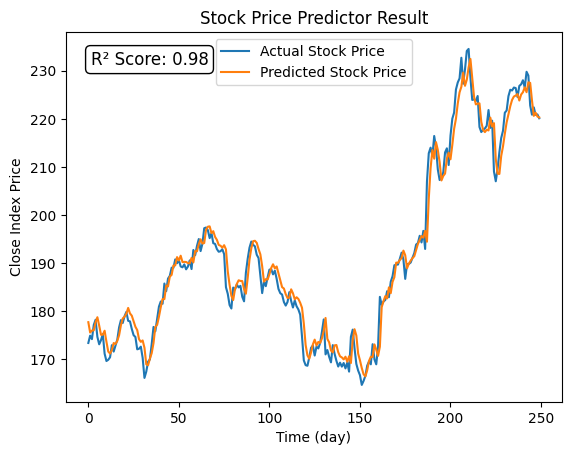

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform the predictions to original scale
y_pred_scaled = scaler.inverse_transform(y_pred)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"R² Score: {r2}")
plt.plot(y_test_scaled, label="Actual Stock Price")
plt.plot(y_pred_scaled, label="Predicted Stock Price")
plt.title("Stock Price Predictor Result")
plt.xlabel("Time (day)")
plt.ylabel("Close Index Price")

plt.text(0.05, 0.95, f'R² Score: {r2:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
plt.legend()
plt.show()

